# Benchmark Results
This notebook visualizes the output from the different models on different classification problems

In [1]:
import glob

import numpy as np
import pandas as pd
from plotnine import *

## Sepsis classification

In [2]:
in_files = glob.glob('../../results/single_label.*')
print(in_files[:5])

['../../results/single_label.sepsis.pseudolabel.refinebio_labeled_dataset.3.tsv', '../../results/single_label.sepsis.PCA.deep_net.refinebio_labeled_dataset.4.tsv', '../../results/single_label.sepsis.deep_net.refinebio_labeled_dataset.1.tsv', '../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.2.tsv']


In [3]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.843023,"GSE3037,GSE14882,GSE13015,GSE33118,GSE112811,G...",2599,untransformed,pseudolabel
1,0.975669,"GSE98793,GSE3037,GSE13015,GSE33118,GSE112811,G...",2293,untransformed,pseudolabel
2,0.795724,"GSE98793,GSE14882,GSE13015,GSE33118,GSE112811,...",2694,untransformed,pseudolabel
3,0.967342,"GSE98793,GSE14882,GSE3037,GSE33118,GSE3284,SRP...",2227,untransformed,pseudolabel
4,0.901709,"GSE98793,GSE14882,GSE3037,GSE13015,GSE112811,G...",2647,untransformed,pseudolabel
...,...,...,...,...,...
0,0.950241,"GSE65088,SRP049820,GSE5504,GSE38511,GSE33341,G...",2492,PCA,pytorch_supervised
1,0.840517,"GSE38511,GSE33341,GSE65682,GSE14844,SRP092402,...",2651,PCA,pytorch_supervised
2,0.964981,"GSE65088,SRP049820,GSE5504,GSE38511,GSE33341,G...",2344,PCA,pytorch_supervised
3,0.901361,"GSE65088,SRP049820,GSE5504,GSE33341,GSE65682,G...",2821,PCA,pytorch_supervised


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


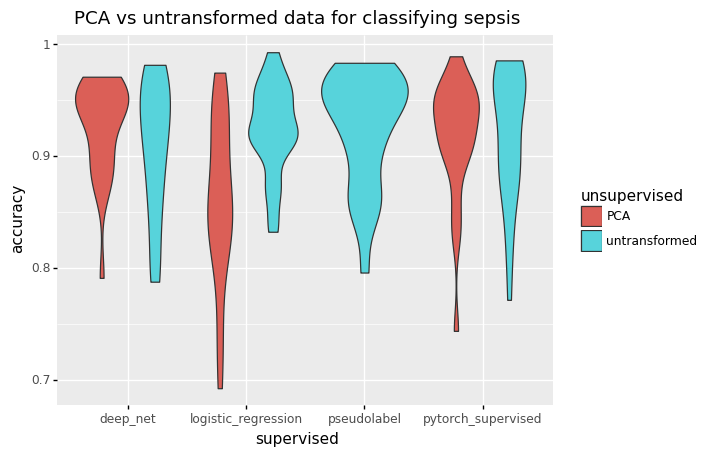

<ggplot: (8792266144883)>


In [4]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


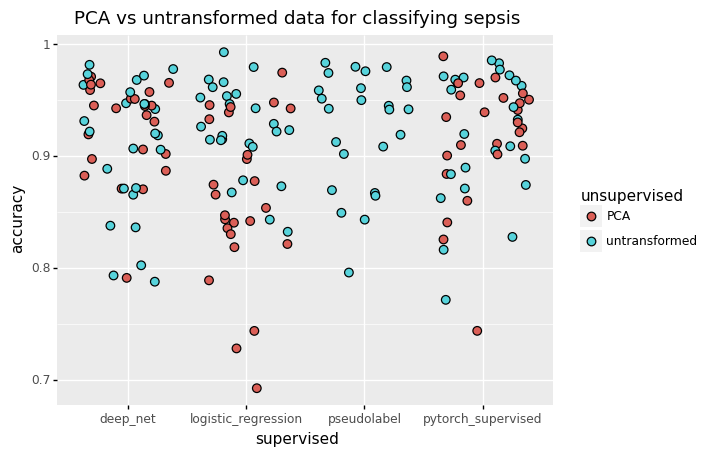

<ggplot: (8792257645120)>


In [5]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=3)
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

## All labels

In [6]:
in_files = glob.glob('../../results/all_labels.*')
print(in_files[:5])

['../../results/all_labels.deep_net.refinebio_labeled_dataset.2.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.0.tsv', '../../results/all_labels.deep_net.refinebio_labeled_dataset.0.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.4.tsv', '../../results/all_labels.PCA.deep_net.refinebio_labeled_dataset.1.tsv']


In [7]:
metrics = None
for path in in_files:
    if metrics is None:
        metrics = pd.read_csv(path, sep='\t')
        
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        metrics['unsupervised'] = unsupervised_model
        metrics['supervised'] = supervised_model
    else:
        new_df = pd.read_csv(path, sep='\t')
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        new_df['unsupervised'] = unsupervised_model
        new_df['supervised'] = supervised_model
        
        metrics = pd.concat([metrics, new_df])

metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.015056,"GSE15316,GSE9960,GSE51808,GSE84844,GSE45923,GS...",8175,untransformed,deep_net
1,0.019048,"GSE15316,GSE51808,GSE5504,GSE84844,GSE45923,GS...",7189,untransformed,deep_net
2,0.000000,"GSE15316,GSE9960,GSE51808,GSE5504,GSE84844,GSE...",8222,untransformed,deep_net
3,0.041231,"GSE9960,GSE45923,GSE5504,GSE98793,GSE112811,GS...",8512,untransformed,deep_net
4,0.002149,"GSE15316,GSE9960,GSE51808,GSE5504,GSE84844,GSE...",8838,untransformed,deep_net
...,...,...,...,...,...
0,0.002183,"GSE93272,E-MEXP-3567,GSE79150,SRP132709,GSE570...",8402,untransformed,logistic_regression
1,0.070588,"GSE42305,E-MEXP-3567,GSE61240,GSE79150,GSE9327...",8109,untransformed,logistic_regression
2,0.053706,"GSE42305,E-MEXP-3567,GSE61240,SRP132709,GSE791...",7981,untransformed,logistic_regression
3,0.017518,"GSE42305,GSE61240,SRP132709,GSE57065,GSE13015,...",8864,untransformed,logistic_regression


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


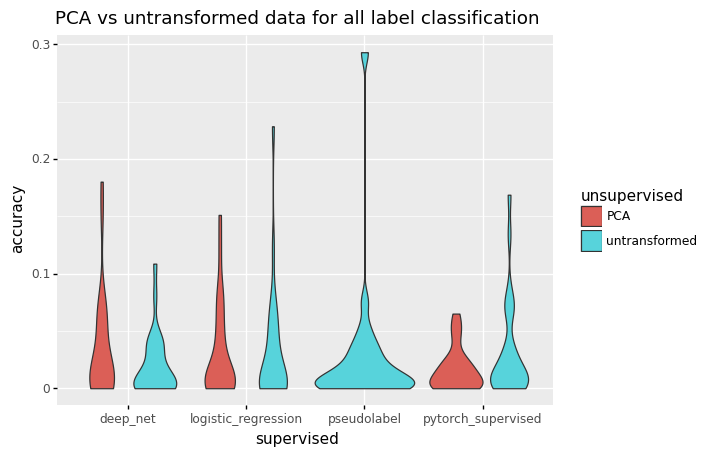

<ggplot: (8792257648351)>


In [8]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


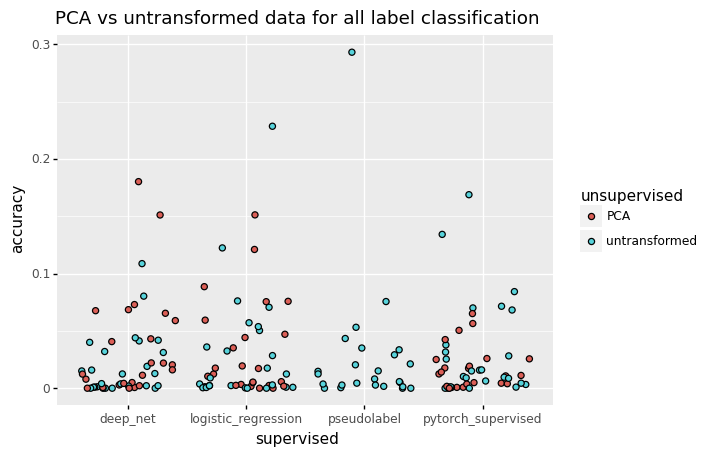

<ggplot: (8792257645222)>


In [9]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=2)
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

# Subsets of healthy labels

In [10]:
in_files = glob.glob('../../results/subset_label.sepsis*')
print(in_files[:5])

['../../results/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.4.tsv', '../../results/subset_label.sepsis.deep_net.refinebio_labeled_dataset.2.tsv', '../../results/subset_label.sepsis.logistic_regression.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.sepsis.PCA.deep_net.refinebio_labeled_dataset.4.tsv', '../../results/subset_label.sepsis.deep_net.refinebio_labeled_dataset.1.tsv']


In [11]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics = sepsis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
sepsis_metrics['healthy_used'] = sepsis_metrics['healthy_used'].round(1)
    
sepsis_metrics

,accuracy,train studies,train sample count,healthy_used,unsupervised,supervised
0,0.910112,"GSE112811,GSE99039,GSE33341,GSE93606,GSE28750,...",1386,0.1,untransformed,pytorch_supervised
1,0.917431,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1548,0.2,untransformed,pytorch_supervised
2,0.923077,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1710,0.3,untransformed,pytorch_supervised
3,0.926667,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",1871,0.4,untransformed,pytorch_supervised
4,0.953216,"GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...",2033,0.5,untransformed,pytorch_supervised
...,...,...,...,...,...,...
35,0.951087,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1425,0.6,PCA,pytorch_supervised
36,0.978261,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1478,0.7,PCA,pytorch_supervised
37,0.961957,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1530,0.8,PCA,pytorch_supervised
38,0.951087,"GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...",1583,0.9,PCA,pytorch_supervised


In [12]:
print(sepsis_metrics[sepsis_metrics['healthy_used'] == 1])

    accuracy                                      train studies  \
9   0.941392  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
19  0.962919  GSE50635,GSE33341,GSE3284,GSE38511,SRP049820,S...   
29  0.924794  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
39  0.908333  GSE112811,GSE99039,GSE3284,GSE93606,GSE28750,G...   
49  0.880460  GSE112811,GSE99039,GSE33341,GSE50635,GSE93606,...   
..       ...                                                ...   
39  0.996610  GSE64338,GSE83456,GSE26378,GSE65682,GSE65088,G...   
9   0.909605  GSE65088,GSE42834,GSE37171,GSE98793,GSE50635,S...   
19  1.000000  GSE33119,GSE65088,GSE42834,GSE50635,GSE66099,G...   
29  0.982456  GSE33119,GSE50635,GSE66099,GSE98793,GSE57065,G...   
39  0.961957  GSE33119,GSE65088,GSE98793,GSE66099,GSE50635,G...   

    train sample count  healthy_used   unsupervised           supervised  
9                 2842           1.0  untransformed   pytorch_supervised  
19                2279           1.0  untrans

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


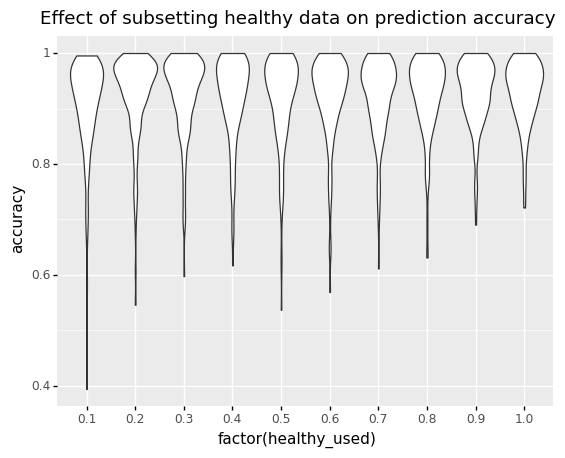

<ggplot: (8792256062224)>


In [13]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', )) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


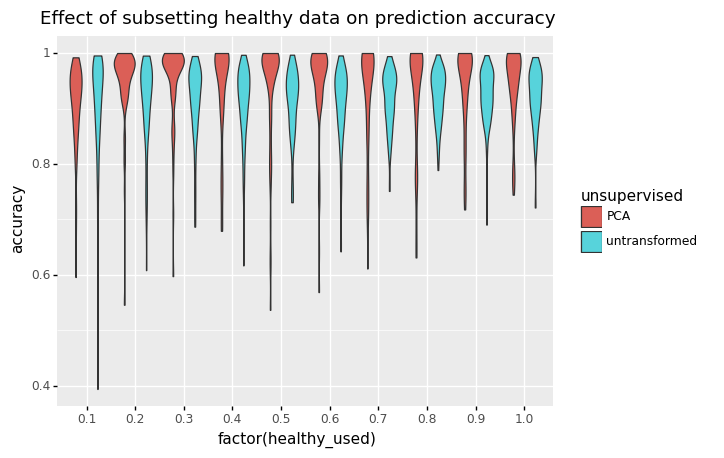

<ggplot: (8792256017547)>


In [14]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


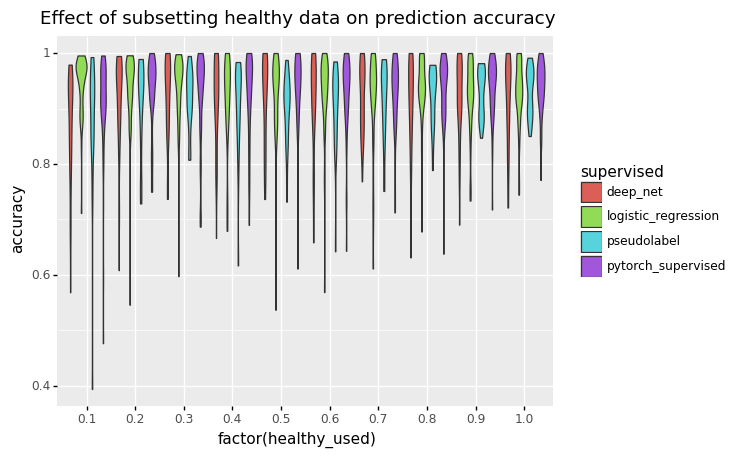

<ggplot: (8792257648201)>


In [15]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Same analysis, but with tb instead of sepsis

In [16]:
in_files = glob.glob('../../results/subset_label.tb*')
print(in_files[:5])

['../../results/subset_label.tb.deep_net.refinebio_labeled_dataset.1.tsv', '../../results/subset_label.tb.PCA.pytorch_supervised.refinebio_labeled_dataset.0.tsv', '../../results/subset_label.tb.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/subset_label.tb.PCA.deep_net.refinebio_labeled_dataset.1.tsv', '../../results/subset_label.tb.PCA.pytorch_supervised.refinebio_labeled_dataset.1.tsv']


In [17]:
tuberculosis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    tuberculosis_metrics = pd.concat([tuberculosis_metrics, new_df])
    
tuberculosis_metrics = tuberculosis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
tuberculosis_metrics['healthy_used'] = tuberculosis_metrics['healthy_used'].round(1)
tuberculosis_metrics

,accuracy,train studies,train sample count,healthy_used,unsupervised,supervised
0,0.676301,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",771,0.1,untransformed,deep_net
1,0.665025,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",923,0.2,untransformed,deep_net
2,0.562232,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",1075,0.3,untransformed,deep_net
3,0.688213,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",1227,0.4,untransformed,deep_net
4,0.593857,"GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...",1379,0.5,untransformed,deep_net
...,...,...,...,...,...,...
35,0.493113,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",544,0.6,PCA,pytorch_supervised
36,0.487603,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",569,0.7,PCA,pytorch_supervised
37,0.330579,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",593,0.8,PCA,pytorch_supervised
38,0.584022,"GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...",617,0.9,PCA,pytorch_supervised


In [18]:
print(tuberculosis_metrics[tuberculosis_metrics['healthy_used'] == 1])

    accuracy                                      train studies  \
9   0.726862  GSE26440,GSE55201,GSE98793,SRP092402,GSE93606,...   
19  0.978193  GSE45291,GSE38511,GSE14844,GSE98793,SRP092402,...   
29  0.648780  GSE45291,GSE26440,GSE38511,GSE14844,GSE98793,S...   
39  0.700809  GSE45291,GSE26440,GSE38511,GSE14844,GSE98793,S...   
49  0.647399  GSE45291,GSE26440,GSE38511,GSE14844,GSE55201,G...   
..       ...                                                ...   
49  0.625241  GSE26378,GSE8121,E-MEXP-1635,GSE5504,GSE66099,...   
9   0.000000  GSE83456,GSE8121,GSE4607,SRP071965,GSE99039,GS...   
19  0.613793  GSE83456,GSE8121,GSE4607,GSE99039,GSE65682,GSE...   
29  0.513812  GSE8121,GSE4607,GSE58411,GSE65682,GSE26049,GSE...   
39  0.258953  GSE83456,GSE8121,GSE58411,GSE26049,GSE93272,GS...   

    train sample count  healthy_used   unsupervised          supervised  
9                 2140           1.0  untransformed            deep_net  
19                2262           1.0  untransfo

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


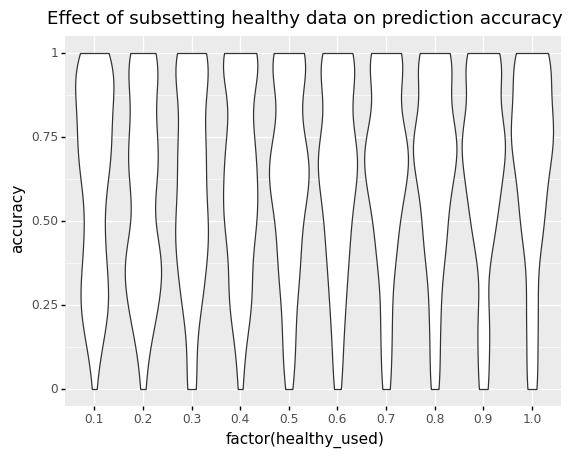

<ggplot: (8792255817994)>


In [19]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


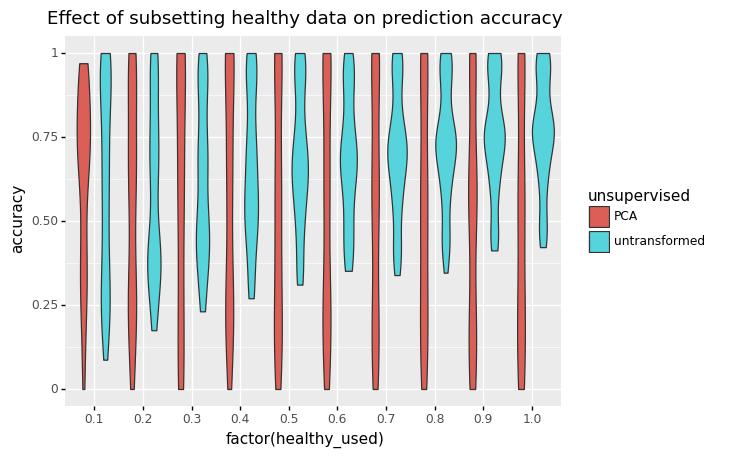

<ggplot: (8792255943138)>


In [20]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


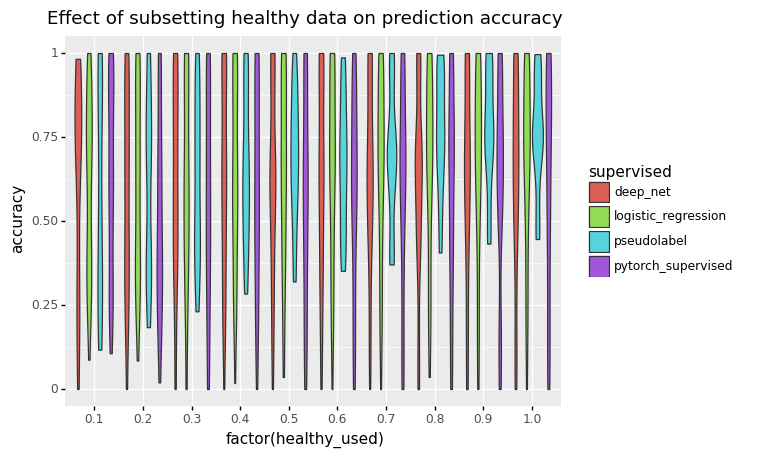

<ggplot: (8792255978093)>


In [21]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Supervised Results Only
The results above show that unsupervised learning mostly hurts performance rather than helping.
The visualizations below compare each model based only on its supervised results.

In [22]:
supervised_sepsis = sepsis_metrics[sepsis_metrics['unsupervised'] == 'untransformed']

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


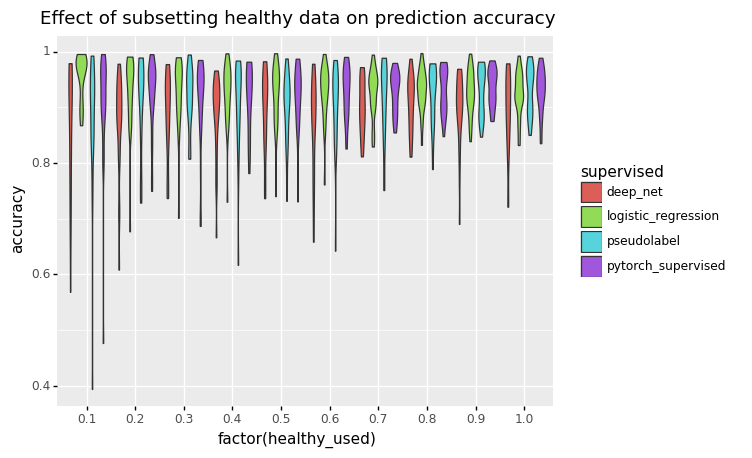

<ggplot: (8792256036175)>


In [23]:
plot = ggplot(supervised_sepsis, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

In [24]:
supervised_tb = tuberculosis_metrics[tuberculosis_metrics['unsupervised'] == 'untransformed']

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


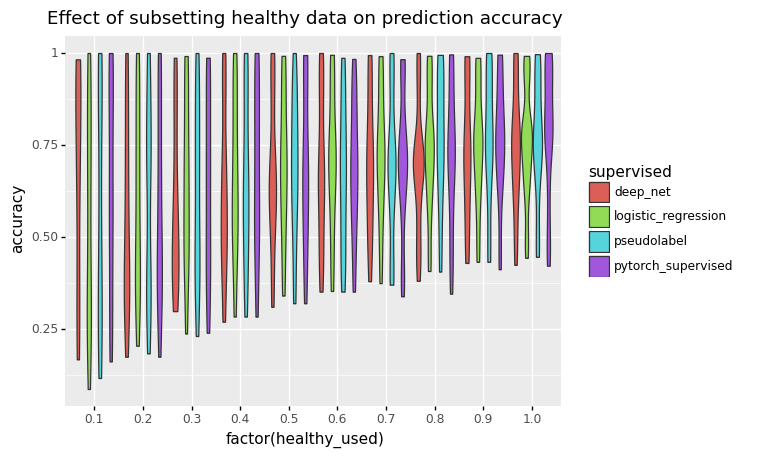

<ggplot: (8792255725388)>


In [25]:
plot = ggplot(supervised_tb, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


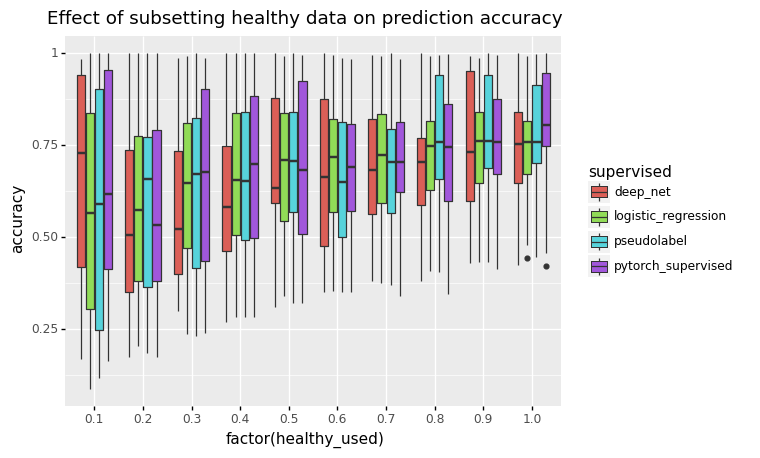

<ggplot: (8792256053471)>


In [26]:
plot = ggplot(supervised_tb, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)